### Imports Libraries

In [53]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


In [3]:
path_to_csv = "amazon-books-cleaned-data/books-data-csv2.csv"
df = pd.read_csv(path_to_csv)


In [6]:
df["title_len"] = df['Title'].str.len()


In [5]:
df['contains_subheading'] = df['Title'].str.contains(":",regex=False)


In [7]:
df["title_num_words"] = df['Title'].str.split().str.len()
df

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,title_num_words,contains_subheading,title_len
0,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996-01-01T00:00:00Z,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,9,True,55
1,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,1988-01-01T00:00:00Z,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,3.0,10,True,39
2,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],http://books.google.com/books/content?id=IjTAB...,http://books.google.nl/books?id=IjTABgAAQBAJ&p...,Book Publishing Company,2012-08-21T00:00:00Z,https://play.google.com/store/books/details?id...,['Biography & Autobiography'],1.0,8,True,52
3,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,['Stefan Draminski'],http://books.google.com/books/content?id=nxttD...,http://books.google.nl/books?id=nxttDwAAQBAJ&p...,Bloomsbury Publishing,2018-09-20T00:00:00Z,https://play.google.com/store/books/details?id...,['History'],1.0,3,False,23
4,Mini-mysteries,NaN,NaN,http://books.google.com/books/content?id=mhqyg...,http://books.google.nl/books?id=mhqygn6STHgC&p...,Remedia Publications,NaN,http://books.google.nl/books?id=mhqygn6STHgC&d...,NaN,1.0,1,False,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49746,Thin Within,"I want to lose weight, but dieting just doesn'...","['Judy Halliday', 'Arthur Halliday']",http://books.google.com/books/content?id=L_YV_...,http://books.google.com/books?id=L_YV_kuQwk8C&...,Thomas Nelson,2005-04-17T00:00:00Z,https://play.google.com/store/books/details?id...,['Health & Fitness'],9.0,2,False,11
49747,The Awakening and Selected Stories (Modern Lib...,"WHEN IT FIRST APPEARED IN 1899, THE AWAKENING ...",['Kate Chopin'],http://books.google.com/books/content?id=TDK4u...,http://books.google.com/books?id=TDK4u5Fl2D8C&...,Library of Alexandria,2003-01-01T00:00:00Z,https://play.google.com/store/books/details?id...,['Adultery'],2.0,8,False,60
49748,Final things,Grace's father believes in science and builds ...,['Jenny Offill'],http://books.google.com/books/content?id=UbSFB...,http://books.google.com/books?id=UbSFBAAAQBAJ&...,Vintage,2015-03-17T00:00:00Z,https://play.google.com/store/books/details?id...,['Fiction'],4.0,2,False,12
49749,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01T00:00:00Z,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0,8,False,51


In [ ]:

# from transformers import pipeline
# sentiment_pipeline = pipeline("sentiment-analysis")
# data = ["I love you", "I hate you"]
# sentiment_pipeline(data)


In [4]:
path_to_cleaned_data = "cleaned.csv"
df2 = pd.read_csv(path_to_cleaned_data)
df2

,title,description,authors,publisher,published_date,categories,ratings_count,id,price,user_id,profile_name,review_helpfulness,review_score,review_time,review_summary,review_text
0,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996-01-01T00:00:00Z,['Religion'],5,0802841899,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...
1,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996-01-01T00:00:00Z,['Religion'],5,0802841899,25.97,A36TPZSH8LBT1,haskell,2/3,5,1311465600,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...
2,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996-01-01T00:00:00Z,['Religion'],5,0802841899,25.97,ANX3DDV12ZRRU,GodsBreath.wordpress,2/3,4,1289952000,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...
3,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996-01-01T00:00:00Z,['Religion'],5,0802841899,25.97,A2H2LORTA5EZY2,Edward E. Howe,3/5,4,1266192000,Christ is Lord,This is a very useful and thorough text book. ...
4,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,1988-01-01T00:00:00Z,NaN,3,B000JINSBG,NaN,A15A5KPP3AL76U,Vinny Wolf,0/0,5,1361491200,meaty and fast,"This play was excellent. It's very smart, inte..."
5,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,1988-01-01T00:00:00Z,NaN,3,B000JINSBG,NaN,A2HF2IYAYUH8P8,Shirleyann Costigan,0/0,4,1357862400,Surprisingly delightful,This is a fast read filled with unexpected hum...
6,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,1988-01-01T00:00:00Z,NaN,3,B000JINSBG,NaN,A3V0MK4KOD61KO,"porsche driver ""porsche driver""",1/3,5,1243728000,A walk in the woods,This is an old play I saw on stage many years ...
7,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],Book Publishing Company,2012-08-21T00:00:00Z,['Biography & Autobiography'],1,157067051X,NaN,A3W1KIKQ93S62,John Washington,21/21,5,1097107200,Excellent perspective on communal living and h...,"Ironically, I grew up in a small town close to..."
8,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],Book Publishing Company,2012-08-21T00:00:00Z,['Biography & Autobiography'],1,157067051X,NaN,A1ER5AYS3FQ9O3,"K. Corn ""reviewer""",6/7,5,1160870400,Intense memoir told in brief segments by forme...,This book gave me a glimpse at life on The Far...
9,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],Book Publishing Company,2012-08-21T00:00:00Z,['Biography & Autobiography'],1,157067051X,NaN,A1MKXB7UA801SP,"Jennifer R. Andry ""Songbird""",2/2,5,1193011200,If you are looking into starting or joining a ...,This book contains true accounts from former r...


In [33]:
df3 = df2[['title','review_score']]
df4 = df3.groupby(['title'], as_index=False).agg('mean')
df4["title_num_words"] = df4['title'].str.split().str.len()
df4['contains_subheading'] = df4['title'].str.contains(":",regex=False).astype(int)
df4

,title,review_score,title_num_words,contains_subheading
0,"""A"" IS FOR ALIBI",3.672727,4,0
1,"""Ah so!"": Japanese for kids",1.000000,5,1
2,"""Beatles"" Illustrated Lyrics",4.384615,3,0
3,"""C"" Language",4.000000,2,0
4,"""C"" is for Corpse (A Kinsey Millhone mystery, ...",4.170000,10,0
...,...,...,...,...
49746,ttyl,3.383648,1,0
49747,what's happening to me? the answers to some of...,4.078431,14,0
49748,white is,4.000000,2,0
49749,wild animals and their babies,5.000000,5,0


In [44]:
X = np.column_stack((np.array(df4['title_num_words']), np.array(df4['contains_subheading'])))
X

array([4, 5, 3, ..., 2, 5, 4], dtype=int64)

In [37]:
y = np.array(df4['review_score'])
y

array([3.67272727, 1.        , 4.38461538, ..., 4.        , 5.        ,
       4.76190476])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=7)

knn.fit(X_train,y_train)

predictions = knn.predict(X_test)

9951

In [55]:
for i, weights in enumerate(["uniform", "distance"]):
    knn = KNeighborsRegressor(7, weights=weights)
    y_ = knn.fit(X_train, y_train).predict(X_test)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X_train, y_train, color="darkorange", label="data")
    plt.plot(X_test, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
    
plt.tight_layout()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 2  7  5 ... 10  9  4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

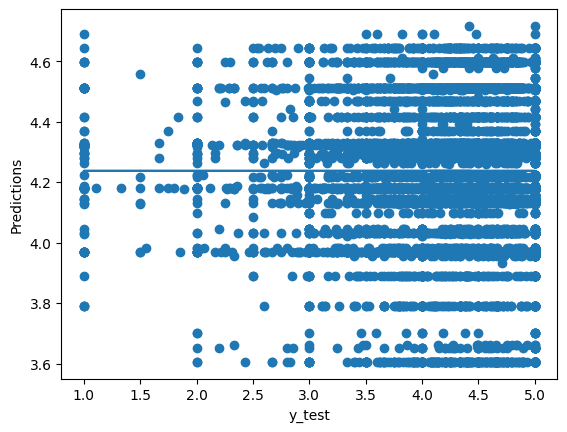

In [71]:

plt.scatter(y_test, predictions)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.show()

In [66]:
print(predictions)

[4.03305957 4.1457483  4.64471243 ... 4.51055056 3.97002785 4.32348287]
